In [1]:
import json
import pandas as pd

In [2]:
DIR = ".\\"
DATA_DIR = ".\data\goodreads_reviews_spoiler_raw.json"

# Data Preprocessing
In this notebook, we want to preprocess the following table:

1. a book table which includes the average rating, number of reviews, book id 
2. a user table which includes user_id, book he read before (a set), review_id
3. a review table which contains user id, book_id, review_id, rating, review_text

In [3]:
def process_book_table(record, table):
    
    book_id = record['book_id']
    
    if not book_id in table.keys():
        table[ book_id ] = {'rating': record['rating'] ,'num_rate':1} #make a new key of this book being rated
        return(table)
    
    table[book_id]['rating'] = round(
        (table[book_id]['rating']*table[book_id]['num_rate'] + record['rating']) / (table[book_id]['num_rate']+1)
        ,2)
    table[book_id]['num_rate'] += 1
    
    return(table)
    
    

In [4]:
def process_user_table(record, table):
    
    user_id = record['user_id']
    
    if not user_id in table.keys():
        table[user_id] = {'book_read':set() , "reviews":set() }
    
    table[user_id]['book_read'].add(record['book_id'])
    table[user_id]['reviews'].add(record['review_id'])
    
    return(table)

In [5]:
def process_review_table(record, table):
    
    review_id = record['review_id']
    
    if review_id in table.keys():
        return table  #this means we have a duplicate record
    else:
        table[review_id] = {}
        table[review_id]['rating'] = record['rating']
        table[review_id]['text'] = record['review_text']
        table[review_id]['user_id'] = record['user_id']
        table[review_id]['book_id'] = record['book_id']
        
    return(table)

In [25]:
#------------------------------
#      initialize
#------------------------------
Tab_book = {}
Tab_user = {}
Tab_review = {}


num_records = 1330981   #there are this number of record in total
index = 0 

#----------------------------
#     run main
#----------------------------

with open(DATA_DIR) as fie:
    for review in fie:
        
        if index > num_records:
            fie.close()
            break
            
        
            
        record = json.loads(review)  #load json as a dictionary
        
        if record['rating'] == 0:
            continue
            
        Tab_book = process_book_table(record, Tab_book)
        Tab_user = process_user_table(record, Tab_user)
        Tab_review = process_review_table(record, Tab_review)
        #print( record.keys() )
        #print(record['review_text'])
        
        #print(i)
        index+=1
    
    
    
    fie.close()
    

# Some example to get data

## 1. get all review id/full record by a given book_id

In [47]:
book_id = '28004020'
result = [k  for (k,v) in Tab_review.items() if v['book_id']=='28004020']
result[0:5]

['46add98cea67589d4f2311bf081f05a1',
 'f5c8b6a0c24adbb69c93e59eae1fb164',
 '1ce3ab7364898eca1b9e4e6b38546342',
 '3e3fd64aafc7b3af7d52fe57648a2afa',
 '4ece8ab49951d465b3fcf69d5db68480']

In [50]:
result = {k:v  for (k,v) in Tab_review.items() if v['book_id']=='28004020'}

## 2. get all review text by a given user (so you can study his word distribution)

In [65]:
user_id = '28004020'
result = [v['text']  for (k,v) in Tab_review.items() if v['user_id']=='8842281e1d1347389f2ab93d60773d4d']
result[0:2]

['This is a special book. It started slow for about the first third, then in the middle third it started to get interesting, then the last third blew my mind. This is what I love about good science fiction - it pushes your thinking about where things can go. \n It is a 2015 Hugo winner, and translated from its original Chinese, which made it interesting in just a different way from most things I\'ve read. For instance the intermixing of Chinese revolutionary history - how they kept accusing people of being "reactionaries", etc. \n It is a book about science, and aliens. The science described in the book is impressive - its a book grounded in physics and pretty accurate as far as I could tell. (view spoiler)[Though when it got to folding protons into 8 dimensions I think he was just making stuff up - interesting to think about though. \n But what would happen if our SETI stations received a message - if we found someone was out there - and the person monitoring and answering the signal 

In [66]:
from collections import Counter
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [64]:
corpus = " ".join(result)
Counter(word_tokenize(corpus) )

Counter({'This': 34,
         'is': 230,
         'a': 381,
         'special': 1,
         'book': 140,
         '.': 694,
         'It': 54,
         'started': 4,
         'slow': 2,
         'for': 74,
         'about': 92,
         'the': 608,
         'first': 13,
         'third': 5,
         ',': 571,
         'then': 14,
         'in': 206,
         'middle': 2,
         'it': 212,
         'to': 333,
         'get': 22,
         'interesting': 34,
         'last': 7,
         'blew': 1,
         'my': 29,
         'mind': 5,
         'what': 35,
         'I': 278,
         'love': 29,
         'good': 22,
         'science': 10,
         'fiction': 3,
         '-': 172,
         'pushes': 1,
         'your': 23,
         'thinking': 4,
         'where': 21,
         'things': 20,
         'can': 31,
         'go': 11,
         '2015': 1,
         'Hugo': 1,
         'winner': 1,
         'and': 388,
         'translated': 1,
         'from': 53,
         'its': 18,
         '

In [74]:
stop_words = set(stopwords.words('english')) 
punctuation = set([ '.',',','This','-','\'\''] )
stop_words = stop_words.union(punctuation)
filtered_sentence = [w for w in word_tokenize(corpus) if not w in stop_words] 
Counter(filtered_sentence) 

Counter({'special': 1,
         'book': 140,
         'It': 54,
         'started': 4,
         'slow': 2,
         'first': 13,
         'third': 5,
         'middle': 2,
         'get': 22,
         'interesting': 34,
         'last': 7,
         'blew': 1,
         'mind': 5,
         'I': 278,
         'love': 29,
         'good': 22,
         'science': 10,
         'fiction': 3,
         'pushes': 1,
         'thinking': 4,
         'things': 20,
         'go': 11,
         '2015': 1,
         'Hugo': 1,
         'winner': 1,
         'translated': 1,
         'original': 1,
         'Chinese': 2,
         'made': 15,
         'different': 6,
         'way': 23,
         "'ve": 11,
         'read': 45,
         'For': 9,
         'instance': 7,
         'intermixing': 1,
         'revolutionary': 1,
         'history': 6,
         'kept': 5,
         'accusing': 1,
         'people': 36,
         '``': 48,
         'reactionaries': 1,
         'etc': 8,
         'aliens': 2,
    

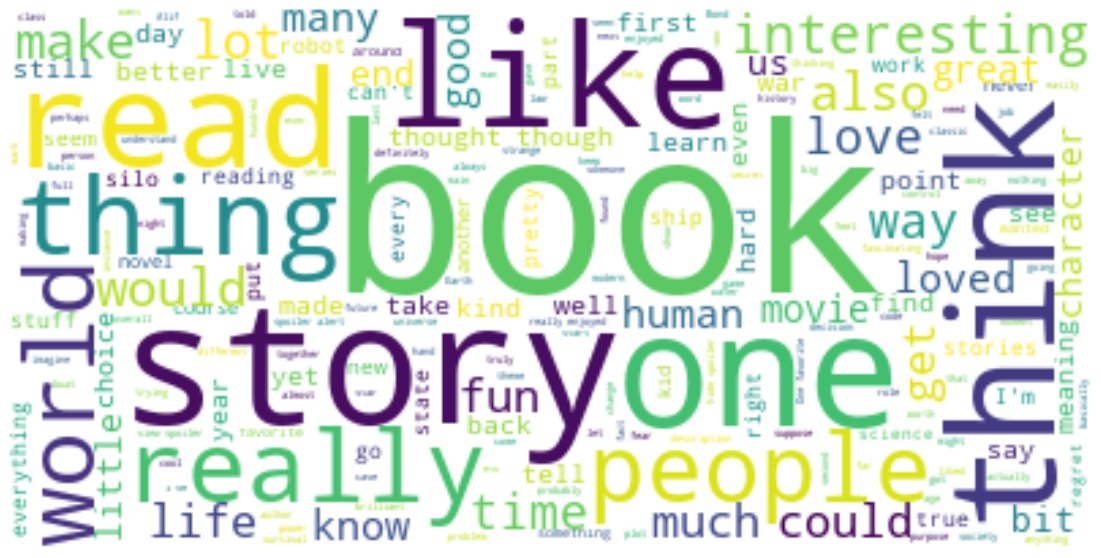

In [80]:
wordcloud = WordCloud(stopwords = stop_words, background_color="white").generate(corpus)
plt.figure(figsize=[20,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## 3. Cache three data set

In [81]:
import pickle

In [93]:
filename = 'tab_user.firefire'
outfile = open(filename,'wb')
pickle.dump(Tab_user,outfile)
outfile.close()

Then unpickle it

In [94]:
infile = open(filename,'rb')
new_dict = pickle.load(infile, encoding='latin1')
infile.close()

In [97]:
print( type(new_dict['8842281e1d1347389f2ab93d60773d4d']['book_read']) )#the datatype is maintained well

set

In [98]:
filename = 'tab_review.firefire'
outfile = open(filename,'wb')
pickle.dump(Tab_review,outfile)
outfile.close()

In [99]:
filename = 'tab_book.firefire'
outfile = open(filename,'wb')
pickle.dump(Tab_book,outfile)
outfile.close()